In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import json
import cv2
from PIL import Image, ImageDraw

In [2]:
filePath = '/home/shared/DARPA/training/'
jsonName = 'ID_Pullman.json'
tifName = 'ID_Pullman.tif'

In [3]:
# Find the coordinates of a legend label in the tif map
with open(filePath+jsonName, 'r') as f:
    jsonData = json.load(f)
    
index = 6
points, legendLabel = jsonData['shapes'][index]['points'], jsonData['shapes'][index]['label']
points, legendLabel

([[8029.87012987013, 2766.2337662337663],
  [8172.727272727273, 2864.935064935065]],
 'Tcg_poly')

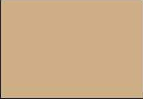

In [4]:
im = Image.open(filePath+tifName)
#im.show()
im_crop_outside = im.crop(points[0]+points[1])
im_crop_outside.show()

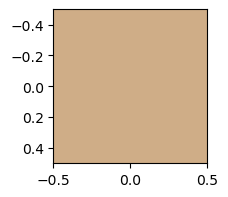

In [5]:
# select RGB from legend color

legend_box = jsonData['shapes'][index]['points']
middle_x = int((points[0][0] + points[1][0])/2)
middle_y = int((points[0][1] + points[1][1])/2)

imarray = np.array(im) 
R, G, B = imarray[middle_y][middle_x]

plt.rcParams['figure.figsize'] = [4, 2]
plt.imshow([[[R, G, B]]])
plt.show()

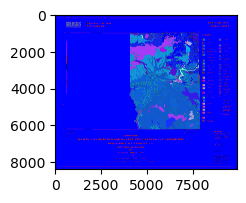

In [6]:
imarray = cv2.imread(filePath+tifName)
hsv = cv2.cvtColor(imarray, cv2.COLOR_BGR2HSV) 
plt.imshow(hsv)
plt.show()

In [7]:
R, G, B

(207, 173, 135)

In [8]:
# rgb_lo = np.array([R-20, G-20, B-20])
# rgb_hi = np.array([R+20, G+20, B+20])

rgb_lo = np.array([20, 80, 80])   
rgb_hi = np.array([30, 255, 255])

In [9]:
mask = cv2.inRange(hsv, rgb_lo, rgb_hi)
result = cv2.bitwise_and(imarray, imarray, mask=mask)

In [10]:
# predicted_label_points = np.argwhere(mask != 0)
# predicted_label_points

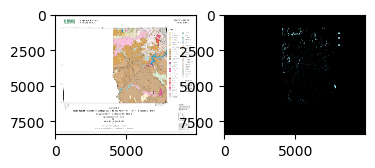

In [11]:
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

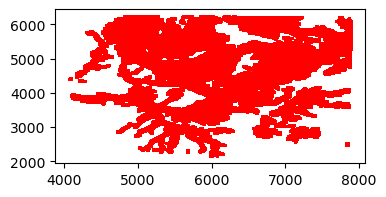

In [69]:
ture_label = cv2.imread(filePath+'ID_Pullman_Tcg_poly.tif')
# ture_label_points = np.argwhere(ture_label != 0)
# plt.rcParams['figure.figsize'] = [4, 2]
# plt.scatter(x=ture_label_points[:,1], y=ture_label_points[:,0], c='r', s=1)
# plt.show()

In [ ]:
plt.subplot(1, 2, 1)
plt.imshow(im)
plt.scatter(x=labeled_points[:,1], y=labeled_points[:,0], c='r', s=10)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.show()

implot = plt.imshow(im)

plt.scatter(x=labeled_points[:,1], y=labeled_points[:,0], c='r', s=10)
plt.show()

In [ ]:
## Removing unnecessary noise from masks:

#define kernel size  
kernel = np.ones((7,7),np.uint8)
# Remove unnecessary noise from mask
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

In [ ]:
## Apply the mask on the image

# Segment only the detected region
segmented_img = cv2.bitwise_and(img, img, mask=mask)

In [ ]:
## Draw a Boundary of the detected objects:
# Find contours from the mask
contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(segmented_img, contours, -1, (0, 0, 255), 3)
# Showing the output
cv2.imshow("Output", output)